<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Fall 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

# Homework 8 #

### Instructions

Your homeworks have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

In [1]:
# Run this cell to set up your notebook

import numpy as np
from scipy import stats
from datascience import *
from prob140 import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)

### 1. The Exact Distribution of a Sum ###
In this exercise we will use the same shorthand as in the textbook: "A random variable $W$ has distribution given by the probabilities $p_0, p_1, \ldots, p_N$" means that $P(W = i) = p_i$ for $0 \le i \le N$ and $\sum_{i=0}^N p_i = 1$.

Before you start this exercise, carefully go through the code in [Section 14.2](http://prob140.org/textbook/Chapter_14/02_PGFs_in_NumPy.html) of the textbook. As always, feel free to create more code cells as needed.

**a) [CODE]** Let $X$ have the distribution given by $p_0 = 0.45$, $p_1 = 0.25$, $p_3 = 0.2$, $p_4 = 0.05$, $p_5 = 0.05$. Construct the pgf of $X$.

**b) [CODE]** Let $X_1, X_2, \ldots, X_8$ be i.i.d. with the same distribution as $X$ in (a). Let $S_X = X_1 + X_2 + \cdots + X_8$. Use `Plot` to plot the probability histogram of $S_X$. 

**c) [CODE]** Find $P(S_X = 13)$.

**d) [CODE]** Let $Y$ have the uniform distribution on the integers 4 through 8. Let $Y_1, Y_2, \ldots, Y_{12}$ be i.i.d. with the same distribution as $Y$, and let $S_Y = Y_1 + Y_2 + \cdots + Y_{12}$. Use `Plot` to plot the histogram of the distribution of $W = S_X + S_Y$.

**e) [CODE]** For a `prob140` distribution object `dist`, the expression `dist.ev()` evaluates to the expectation and `dist.sd()` evaluates to the SD. At this point you should already have a distribution object representing $W$, so use these methods to find $E(W)$ and $SD(W)$. To check that you found the right distribution of $W$, use `.ev()` and `.sd()` to find the expectations and SDs of $X$ and $Y$, and then use rules of expectation and variance to find $E(W)$ and $SD(W)$. Confirm that these are the same as what you got from directly using the distribution of $W$. 

In [2]:
#Answer to 1a

# Construct the distribution of X
dist_X = Table().values(make_array(0,1,2,3,4,5)).probabilities(make_array(0.45, 0.25,0, 0.2,0.05,0.05))

# Extract the array of probabilities
probs_X = dist_X['Probability']

# Get the coefficients of the pgf in the appropriate order
coeffs_X = np.flipud(probs_X)

# Construct the pgf
pgf_X = np.poly1d(coeffs_X)

# Display the pgf
print(pgf_X)

      5        4       3
0.05 x + 0.05 x + 0.2 x + 0.25 x + 0.45


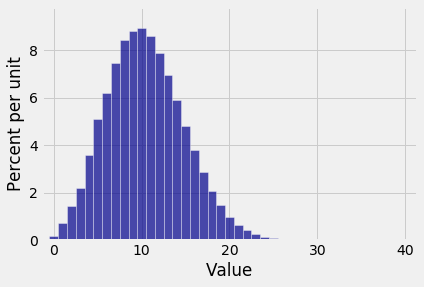

In [3]:
#Answer to 1b

pgf_SX = pgf_X**8
coeffs_SX = pgf_SX.c # coefficients of pgf of S_X

# Distribution object for S_X
# Careful ...
# Think how you will extract the possible values and corresponding chances.
# Use extra lines if you need them.

dist_SX = Table().values(np.arange(41)).probabilities(np.flipud(coeffs_SX))

Plot(dist_SX)

In [4]:
#Answer to 1c
prob_SX_13 = dist_SX.where('Value', 13)['Probability'][0]
prob_SX_13

0.06964776875000002

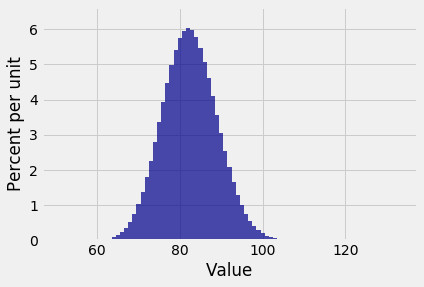

In [5]:
#Answer to 1d

# The following is provided as a very brief skeleton
# The solution uses more lines than are provided in the skeleton
# Be sure to refer to your setup for (1a) and (1b)

dist_Y = Table().values(np.arange(0,9)).probabilities(make_array(0,0,0,0,0.2,0.2,0.2,0.2,0.2)) # distribution object for Y
pgf_Y = np.poly1d(np.flipud(dist_Y['Probability'])) # pgf of Y
pgf_SY = pgf_Y**12# pgf of S_Y
pgf_W = pgf_SY*pgf_SX# pgf of W = S_X + S_Y
dist_W = Table().values(np.arange(137)).probabilities(np.flipud(pgf_W.c))# distribution object for W

Plot(dist_W)

In [6]:
## Answer to 1e

# Use dist_W here
print("E(W) =", dist_W.ev())
print("SD(W) =", dist_W.sd())

# Use dist_X and dist_Y here

print("E(W) =", 8*dist_X.ev() + 12*dist_Y.ev())
print("SD(W) =", np.sqrt(dist_SX.sd()**2 + 12*dist_Y.sd()**2))

E(W) = 82.40000000000006
SD(W) = 6.578753681359413
E(W) = 82.4
SD(W) = 6.578753681359412


#newpage

### 2. What's Normal? ###

Before you answer this question, please read all of [Section 14.5](http://prob140.org/textbook/Chapter_14/05_Confidence_Intervals.html) of the textbook. We did almost all of it in lecture on Thursday 10/17 but stopped a bit before the end. The bit we didn't do is a review of Data 8.

As a preliminary (which is also in the textbook section), let $\Phi$ be the standard normal cdf, that is, $\Phi(z) = P(Z \le z)$ where $Z$ is a standard normal random variable. Then you know that for a specified $z$ you can find $\Phi(z)$ by using `stats.norm.cdf(z, mean, sd)`:

In [7]:
z = 2
stats.norm.cdf(2, 0, 1)

0.9772498680518208

The function $\Phi^{-1}$ returns the $z$ for a specified value of $\Phi$. That is, $\Phi^{-1}(p)$ is the value of $z$ such that $\Phi(z) = p$. 

In the `stats` module, $\Phi^{-1}$ is called the "percent point function" and the call is `stats.norm.ppf(p, mean, SD)`:

In [8]:
stats.norm.ppf(0.9772498680518208, 0, 1)

2.0000000000000004

In any part of this question that involves a sample size, you can assume the sample size is big enough for the Central Limit Theorem approximation to be good. But pay attention to what is being approximated by the CLT.

**a)** In a simple random sample of 1000 faculty taken among all universities in a country, the number of papers published by the sampled faculty in the past year had a mean of 1.1 and an SD of 1.8. Does the Central Limit Theorem say that the distribution of the number of papers published by the sampled faculty in the past year is roughly normal? If not, what do you think is the shape of that distribution? Explain based on the information given in the problem.

**b)** Continuing Part **a**, construct an approximate 90% confidence interval for the mean number of papers published by faculty at all universities in the country in the past year. Justify your answer. If it is not possible to construct the interval, explain why not.

90% Confidence Interval Approximated using Normal Curve: [1.00637329 1.19362671]


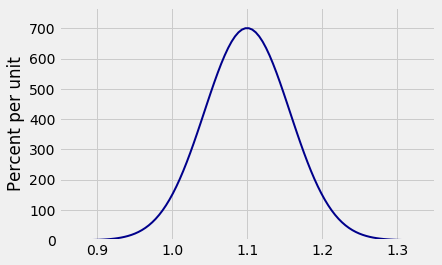

In [9]:
# Approximate distribution of sample mean

n = 1000
mu = 1.1
sigma = 1.8

mean = n*mu
sd = (n**0.5)*sigma

plot_interval = make_array(mean-4*sd, mean+4*sd)

Plot_norm(plot_interval/1000, mean/1000, sd/1000)


z = stats.norm.ppf(0.95) #Z-score for 90% confidence interval

ci_90_pop_mean = mu + z * make_array(-1, 1) * sd/1000

print('90% Confidence Interval Approximated using Normal Curve:', ci_90_pop_mean)

#newpage

### 3. Widths of Confidence Intervals ###
In any part of this question that involves a sample size, you can assume the sample size is big enough for the Central Limit Theorem approximation to be good.

**a)** A survey organization has used the methods of our class to construct an approximate 95% confidence interval for the mean annual income of households in a county. The interval runs from $\$66,000$ to $\$70,000$. If possible, find an approximate 99% confidence interval for the mean annual income of households in the county. If this is not possible, explain why not.

**b)** A survey organization is going to take a simple random sample of $n$ voters from among all the voters in a state, to construct a 99% confidence interval for the proportion of voters who favor a proposition. Find an $n$ such that the total width of the confidence interval (left end to right end) will be no more than 0.06. Remember that you can bound the variance of an indicator.

In [10]:
#Answer for part a
mu = 70000-(70000 - 66000)/2
z95 = stats.norm.ppf(0.975)
sd = 2000/z95
z99 = stats.norm.ppf(0.995)

ci_99_pop_mean = mu + z99 * make_array(-1, 1) * sd

print('99% Confidence Interval Approximated using Normal Curve:', ci_99_pop_mean)

99% Confidence Interval Approximated using Normal Curve: [65371.55445318 70628.44554682]


In [11]:
#Answer for part b
n = (z99/0.06)**2
print('We know that we want 0.06 >= 2*(z99 * 0.5/sqrt(n)) --> 0.06 >= z99 * 1/sqrt(n), we bound the SD here since we know that the highest the variance can be for individual indicator variables is 0.25 (var = p*q), thus we can bound n by using this maximum variance since if the true proportions, p, is actually greater or less then 0.5 then the variance will be less theh 0.25 and hence the confidence interval will be less then 0.06 for the given n, now all we need to do is solve for n: n >= (z99/0.06)**2 >=', n, 'but we must round this up since we cannot sample a decimal amount of people', round(n+0.5))


We know that we want 0.06 >= 2*(z99 * 0.5/sqrt(n)) --> 0.06 >= z99 * 1/sqrt(n), we bound the SD here since we know that the highest the variance can be for individual indicator variables is 0.25 (var = p*q), thus we can bound n by using this maximum variance since if the true proportions, p, is actually greater or less then 0.5 then the variance will be less theh 0.25 and hence the confidence interval will be less then 0.06 for the given n, now all we need to do is solve for n: n >= (z99/0.06)**2 >= 1843.026833617004 but we must round this up since we cannot sample a decimal amount of people 1844.0


#newpage

### 4. A Mixture ###
This is adapted from a problem from Pitman's text. 

Transistors produced by one machine have a lifetime that is exponentially distributed with mean 100 hours. Those produced by a second machine have an exponentially distributed lifetime with mean 200 hours. A package of 12 transistors contains 4 produced by the first machine and 8 produced by the second. Let $X$ be the lifetime of a transistor picked at random from the package. 

We say that the distribution of $X$ is a *mixture* of the two exponential distributions. Conditioning is the most natural way to study mixtures. **Answer each part below by conditioning.**

**a)** Find the numerical value of $P(X > 200)$. You don't have to turn in the code; just show your math, then create a cell in any of your notebooks to calculate the value, and report the value at the end of your math calculation. For a number $c$, the expression `np.exp(c)` evaluates to $e^c$.

**b)** Find the numerical value of $E(X)$. 

**c)** For $x > 0$, find $P(X \in dx)$ and hence find the density of $X$.

In [12]:
#Answer for part a
P_200 = (4/12)*(np.exp(-0.01*200)) + (8/12)*(np.exp(-0.005*200))
P_200

0.2903647218598324

#newpage

### 5. Relations Between Three Well Known Distributions ###

**a)** Let $U$ be uniform on $(0, 1)$ and let $X = -\log(U)$. Find the possible values of $X$ and the cdf of $X$. Recognize that $X$ has a well known distribution and provide its name and parameters.

**b)** Products of uniform $(0, 1)$ random samples arise when the data are "fractions of fractions of fractions of ..." some quantity. Let $U_1, U_2, \ldots, U_n$ be an i.i.d. uniform $(0, 1)$ sample and let $Y_n = (U_1U_2 \cdots U_n)^{\frac{1}{n}}$ be the *geometric mean* of the sample. Show that when $n$ is large the distribution of $\log(Y_n)$ is close to one of the famous ones, and provide its name and parameters.

**c)** Let $Z$ be standard normal and let $W = e^Z$. Then $\log(W) = Z$, that is, the log of $W$ has a normal distribution. That is why the distribution of $W$ is called *lognormal*. Find the cdf of $W$ in terms of the standard normal cdf $\Phi$, and hence find the density of $W$ in terms of the standard normal density $\phi$. State the possible values of $W$.

#newpage

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using an application. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    * If you have issues, please make a follow-up post on the general HW 8 Piazza thread.
    
### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so. 
* Submit the assignment to Homework 8 on Gradescope. 
* **Make sure to assign each page of your pdf to the correct question.**
* **It is your responsibility to verify that all of your work shows up in your final PDF submission.**


### **We will not grade assignments which do not have pages selected for each question.** 